<a href="https://colab.research.google.com/github/weathon/remeow/blob/main/generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lumaai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.8 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
key = userdata.get('dream')

In [3]:
import os
from lumaai import LumaAI

client = LumaAI(
    auth_token=key,
)

In [24]:
client.generations.camera_motion.list()

['Static',
 'Move Left',
 'Move Right',
 'Move Up',
 'Move Down',
 'Push In',
 'Pull Out',
 'Zoom In',
 'Zoom Out',
 'Pan Left',
 'Pan Right',
 'Orbit Left',
 'Orbit Right',
 'Crane Up',
 'Crane Down']

In [99]:
generation = client.generations.image.create(
  prompt="image of forest",
)
completed = False
while not completed:
  generation = client.generations.get(id=generation.id)
  if generation.state == "completed":
    completed = True
  elif generation.state == "failed":
    raise RuntimeError(f"Generation failed: {generation.failure_reason}")
  print("Dreaming")
  time.sleep(2)

image_url = generation.assets.image

Dreaming
Dreaming
Dreaming
Dreaming


In [100]:
image_url

'https://storage.cdn-luma.com/dream_machine/1742be60-5d98-46c5-a06b-cf11cfe492f3/4f812cd7-8cb0-4d39-866d-89066f0ada99_image0eab07364834e4e9d92d6d00c639a457b.jpg'

In [103]:
# download image_url into PIL
from PIL import Image
import requests
from io import BytesIO

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

In [104]:
background = img

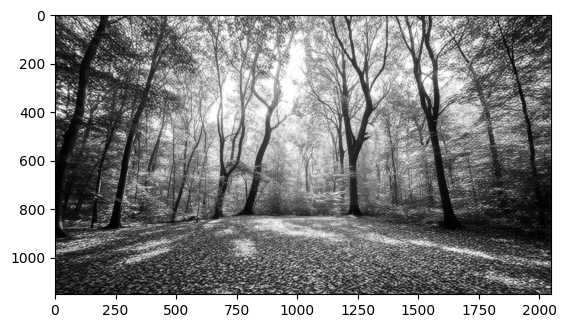

In [44]:
import pylab
pylab.imshow(img, cmap='gray')

In [153]:
import numpy as np
from PIL import Image, ImageDraw, ImageFilter


def soft_edge(size):

  width, height = size
  mask = Image.new("L", (width, height), 0)
  draw = ImageDraw.Draw(mask)
  edge_width = min(width, height) // 10

  for i in range(edge_width):
      draw.rectangle([i, i, width - i - 1, height - i - 1], fill=i * (255 // edge_width))

  blurred_mask = mask.filter(ImageFilter.GaussianBlur(radius=edge_width / 2))
  transparency_array = np.array(blurred_mask)

  return transparency_array/transparency_array.max()


In [177]:
import cv2
video_path = "smoke.mp4"

video = cv2.VideoCapture(video_path)
masks = []
frames = []
blended = []
while video.isOpened():
  background = img.resize((512, 512)).convert("L")
  ret, frame = video.read()
  if not ret:
    break
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  gray = cv2.resize(gray, (512, 512))

  gray = Image.fromarray(gray).resize((128, 128))

  white = Image.new('RGB', (512, 512), (255, 255, 255))

  canvas = Image.new('L', (512, 512), (0))
  softedge_mask = Image.fromarray((soft_edge((128, 128)) * 255).astype("uint8"))
  # softedge_mask = Image.new('L', (512, 512), (0))
  # softedge_mask.paste(softedge_mask, (100, 100))
  canvas.paste(gray, (100, 100), mask=softedge_mask)
  gray = np.array(canvas)
  mask = gray > 0.1 * 255
  gray = Image.fromarray(gray.astype("uint8"))

  masks.append(mask)
  frames.append(gray)
  background.paste(white, (100, 100), mask=Image.fromarray((np.array(gray)//2 * mask).astype("uint8")))
  blended.append(background)

# save blended into video
import cv2
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (512 * 3, 512))
for i in range(len(blended)):
  frame = np.concatenate([np.array(blended[i]), np.array(frames[i]), (np.array(masks[i]) * 255).astype("uint8")], axis=1)
  frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
  out.write(frame)
out.release()

In [176]:
np.array(masks[i])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [169]:
np.array(gray).max()

4

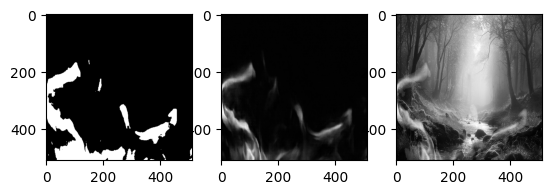

In [117]:
import numpy as np
pylab.subplot(1, 3, 1)
pylab.imshow(frames[10] > 0.1 * 255, cmap="gray")
pylab.subplot(1, 3, 2)
pylab.imshow(frames[10], cmap="gray")
pylab.subplot(1, 3, 3)
pylab.imshow(np.array(blended[10]), cmap="gray")

In [30]:
generation = client.generations.create(
    prompt="Static camera for forest with trees",
)

In [31]:
import time

completed = False
while not completed:
  generation = client.generations.get(id=generation.id)
  if generation.state == "completed":
    completed = True
  elif generation.state == "failed":
    raise RuntimeError(f"Generation failed: {generation.failure_reason}")
  print("Dreaming")
  time.sleep(3)

Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming
Dreaming


In [32]:
generation

Generation(id='02a3d728-b941-4d2d-8915-54f48408837e', assets=Assets(image='https://storage.cdn-luma.com/dream_machine/be3b246a-a619-4a41-95d8-5f40d1835a7a/178da89e-5ae7-4ab4-be53-5ef5881633d6_video_0_thumb.jpg', video='https://storage.cdn-luma.com/dream_machine/be3b246a-a619-4a41-95d8-5f40d1835a7a/88fc075e-7716-44a8-a96f-e8342d8a0c1e_video0a9703820c325484fa1eed482250c44cd.mp4'), created_at=datetime.datetime(2024, 12, 11, 1, 11, 26, 389000, tzinfo=TzInfo(UTC)), failure_reason=None, generation_type='video', model='ray-1-6', request=RequestGenerationRequest(aspect_ratio='16:9', callback_url=None, generation_type='video', keyframes=None, loop=False, prompt='Static camera for forest with trees'), state='completed')

In [ ]:
generation = client.generations.create(
    prompt="CCTV camera for forest",
    keyframes={
      "frame0": {
        "type": "generation",
        "id": generation.id
      }
    }
)